In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [17]:
df = pd.read_csv("data/data_merge.csv")

In [18]:
num_columns = [col for col in df.columns if df[col].dtype != "object"]
cat_columns = [col for col in df.columns if df[col].dtype == "object"]

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

std = StandardScaler()
ohe= OneHotEncoder(sparse=False)

log_1p = FunctionTransformer(func=np.log1p)
preprocessor_pca = ColumnTransformer(
    transformers=[
        ("ohe",ohe,cat_columns),
        ("log",log_1p,num_columns)
    ]
    
)
pca=Pipeline([
     ('preprocessor', preprocessor_pca),
     ('std', std ),
     ("pca", PCA(n_components=0.99,random_state=42))
])

pca_value = pca.fit_transform(df)

/home/apprenant/miniconda3/envs/client/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



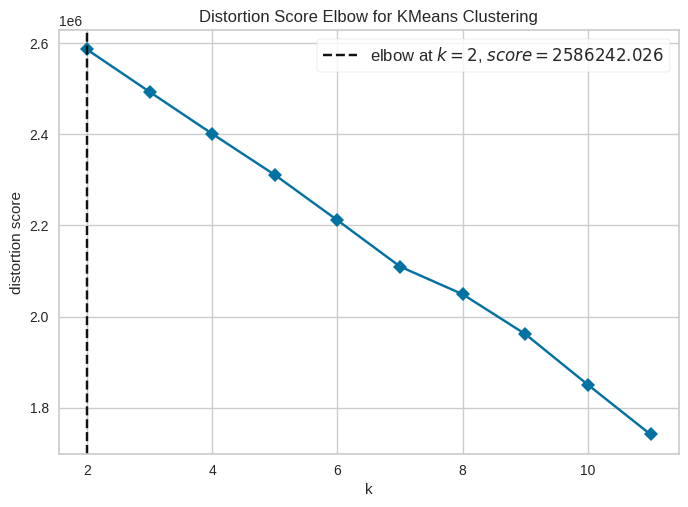

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(n_init=10,random_state=42),metric="distortion", k=(2,12),timings=False)

visualizer.fit(pca_value)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [35]:
kmeans = KMeans(n_clusters=2,n_init=10,random_state=42)
kmeans.fit(pca_value)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [36]:
df["label"]=kmeans.labels_

In [37]:
df

,nb_items_total,montant_total,nb_commande,payment_type_most_frequent,most_frequent_product_category,mean_review_score,mean_payment_installments,mean_length_comment_title,mean_length_comment_message,mean_distance,recence,med_product_photos_qty,med_product_description_lenght,label
0,1.0,141.90,1,credit_card,Furniture,5.0,8.0,15.0,111.0,1.047809,165.0,1.0,236.0,0
1,1.0,27.19,1,credit_card,Health_and_Beauty,4.0,1.0,0.0,0.0,0.215858,168.0,1.0,635.0,0
2,1.0,86.22,1,credit_card,Miscellaneous,3.0,8.0,0.0,0.0,4.718337,591.0,3.0,177.0,0
3,1.0,43.62,1,credit_card,Communication,4.0,4.0,0.0,12.0,22.323718,375.0,5.0,1741.0,0
4,1.0,196.89,1,credit_card,Communication,5.0,6.0,0.0,0.0,1.511395,342.0,3.0,794.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92896,2.0,2067.42,1,credit_card,Health_and_Beauty,5.0,10.0,0.0,0.0,18.181014,501.0,1.0,423.0,0
92897,1.0,84.58,1,credit_card,Baby,4.0,1.0,0.0,0.0,14.007418,316.0,2.0,506.0,0
92898,1.0,112.46,1,credit_card,Automotive,5.0,1.0,0.0,0.0,14.092158,622.0,5.0,716.0,0
92899,1.0,133.69,1,credit_card,Well-being,5.0,5.0,8.0,133.0,6.149897,173.0,3.0,591.0,0


{0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b', 6: '#e377c2', 7: '#7f7f7f', 8: '#bcbd22', 9: '#17becf'}


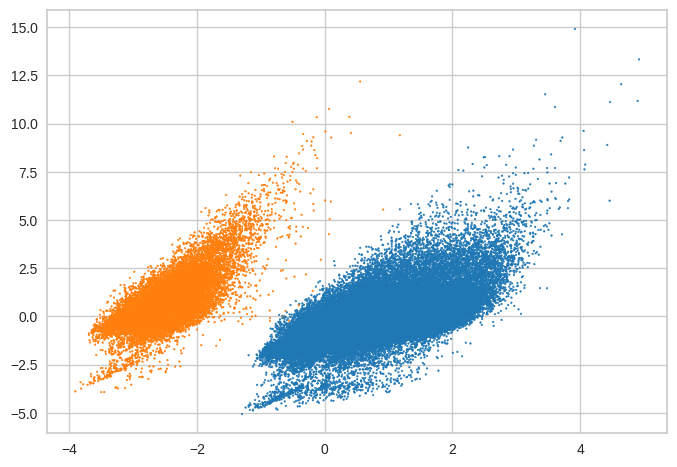

In [38]:
import matplotlib.colors as mcolors

# Créer une liste de couleurs à partir de la palette "Set1" de Matplotlib
set1_colors = list(mcolors.TABLEAU_COLORS.values())[:10]

# Créer un dictionnaire pour mapper des couleurs aux valeurs de la liste
color_dict = {i: set1_colors[i] for i in range(len(set1_colors))}
print(color_dict)

plt.scatter(pca_value[:,0],pca_value[:,1],marker=".",s=6,c=[color_dict[i] for i in df["label"]])
plt.show()

In [39]:
result = df.groupby(['label']).mean()
result

/tmp/ipykernel_24412/825856455.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,nb_items_total,montant_total,nb_commande,mean_review_score,mean_payment_installments,mean_length_comment_title,mean_length_comment_message,mean_distance,recence,med_product_photos_qty,med_product_description_lenght
label,,,,,,,,,,,
0,1.175138,170.872193,1.032666,4.125256,3.494717,1.371652,27.202355,5.584707,291.341603,2.219442,783.624185
1,1.197408,146.741192,1.035529,4.127438,1.017385,1.318078,27.019308,5.597809,297.319483,2.216735,785.044308


In [40]:
import plotly.graph_objects as go

categories = result.columns
fig = go.Figure()

for g in result.index:
    fig.add_trace(go.Scatterpolar(
        r = result.loc[g].values,
        theta = categories,
        fill = 'toself',
        name = f'cluster #{g}'
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5] # here we can define the range
    )),
  showlegend=True,
    title="Issues with Plotly",
    title_x=0.5
)

fig.show()

In [41]:
test

NameError: name 'test' is not defined

In [ ]:
from kmodes.kprototypes import KPrototypes
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

model_Kproto = KPrototypes(n_clusters=4, init="Cao", verbose=2, n_jobs=-1, n_init=8, random_state=42)
df_std = df
df_std[num_columns] = preprocessor.fit_transform(df[num_columns])
model_Kproto.fit_predict(df_std, categorical = catColumnsPos)

In [ ]:
centroides = pca.transform(pd.DataFrame(model_Kproto.cluster_centroids_,columns=df[num_columns+cat_columns].columns))
plt.scatter(pca_value[:,0],pca_value[:,1],c=model_Kproto.labels_,marker=".",s=10)
for center in centroides:
    plt.scatter(center[0],center[1],marker='x',c='r',s=20)